In [77]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_from_disk
import string
from transformers import WhisperProcessor, Wav2Vec2Processor

MODEL_NAME = "whisper-base"

cross_scores_path = f'./incorrect/{MODEL_NAME}/value_zeroing/cross_valueZeroing-cosine_mean.pkl'
decoder_scores_path = f'./incorrect/{MODEL_NAME}/value_zeroing/decoder_valueZeroing-cosine_mean.pkl'
encoder_scores_path = f'./incorrect/{MODEL_NAME}/value_zeroing/encoder_valueZeroing-cosine_mean.pkl'

In [78]:
with open(cross_scores_path, 'rb') as file:
    cross_scores = pickle.load(file)

with open(decoder_scores_path, 'rb') as file:
    decoder_scores = pickle.load(file)

with open(encoder_scores_path, 'rb') as file:
    encoder_scores = pickle.load(file)

print(len(cross_scores))
print(len(encoder_scores))
print(len(decoder_scores))

8
8
8


In [79]:
METRIC = 'cosine'
TASK = "common_voice"
SPLIT = "test" 
SELECTED_GPU = 0

MODEL_PATH = {
    # 'whisper-tiny': 'openai/whisper-tiny',
    'whisper-base': 'openai/whisper-base',
    'whisper-small': 'openai/whisper-small',
    # 'whisper-medium': 'openai/whisper-medium',
    'wav2vec2-large-xlsr-53-french': 'jonatasgrosman/wav2vec2-large-xlsr-53-french',
    # 'asr-wav2vec2-french': 'bhuang/asr-wav2vec2-french',
}

PROCESSOR = {
    'whisper-base': WhisperProcessor.from_pretrained(MODEL_PATH['whisper-base'], task='transcribe', language='french'),
    'whisper-small': WhisperProcessor.from_pretrained(MODEL_PATH['whisper-small'], task='transcribe', language='french'),
    # 'whisper-medium': WhisperProcessor.from_pretrained(MODEL_PATH['whisper-medium'], task='transcribe', language='french'),
    'wav2vec2-large-xlsr-53-french': Wav2Vec2Processor.from_pretrained(MODEL_PATH['wav2vec2-large-xlsr-53-french']), 
    # 'asr-wav2vec2-french': Wav2Vec2Processor.from_pretrained(MODEL_PATH['asr-wav2vec2-french']), 
}



NUM_LAYERS = {
    # 'whisper-tiny': 4,
    'whisper-base': 6,
    'whisper-small': 12,
    # 'whisper-medium': 24,
    'wav2vec2-large-xlsr-53-french': 24,
    # 'asr-wav2vec2-french': 24,
}

ANNOTATED_DATA_PATH = f"/home/scur2350/ieai-miniproject-context-mixing/directory/datasets/{TASK}/{SPLIT}/all/incorrect"
GENERATED_IDS_PATH = f"/directory/predictions/{TASK}/{SPLIT}/{MODEL_NAME}/"

/home/scur2350/ieai-miniproject-context-mixing/.venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [80]:
ex = 3

In [81]:
annot_data = load_from_disk(f"{ANNOTATED_DATA_PATH}/{MODEL_NAME}")
num_examples = len(annot_data)

# print(len(annot_data))
annot_data[ex]

{'template': 'det_noun',
 'org_id': 11091,
 'text': 'Il laisse également de nombreuses lettres, des vies de saints, et des poèmes.',
 'cue_word': 'des',
 'target_word': 'vie',
 'target_word_2': None,
 'path': '/home/razvanmatisan/.cache/huggingface/datasets/downloads/extracted/e1e6b2e8836d131272c71c6a55343abcfb7be6c8f6bbbc66d953adcbd4bce70c/fr_test_0/common_voice_fr_19757857.mp3',
 'audio': {'array': [-4.547473508864641e-12,
   1.8189894035458565e-12,
   4.547473508864641e-12,
   4.547473508864641e-12,
   2.000888343900442e-11,
   -9.094947017729282e-13,
   -1.6825651982799172e-11,
   -5.4569682106375694e-12,
   9.094947017729282e-13,
   -8.185452315956354e-12,
   9.094947017729282e-12,
   3.637978807091713e-12,
   -8.185452315956354e-12,
   1.1823431123048067e-11,
   4.547473508864641e-13,
   4.547473508864641e-12,
   -9.094947017729282e-12,
   8.185452315956354e-12,
   2.2737367544323206e-12,
   -3.183231456205249e-12,
   -1.6370904631912708e-11,
   2.637534635141492e-11,
   1.455191

In [82]:
encoder_words = [alignment['word'] for alignment in annot_data[ex]['alignment']['intervals']]
encoder_words

['il',
 'laisse',
 'également',
 'de',
 'nombreuses',
 'lettres',
 'des',
 'vies',
 'de',
 'saints',
 'et',
 'des',
 'poèmes']

In [83]:
# Load generated ids
generated_ids = {}
for model_name in MODEL_PATH.keys():
    with open(f'/home/scur2350/ieai-miniproject-context-mixing{GENERATED_IDS_PATH}generated_ids.pkl', 'rb') as fp:
        generated_ids[model_name] = pickle.load(fp)

processor = PROCESSOR[MODEL_NAME]

dec_id = annot_data[ex]['org_id']
print(dec_id)
generated_tokens = processor.tokenizer.convert_ids_to_tokens(generated_ids[model_name][dec_id].tolist())

decoder_tokens = []
for token in generated_tokens:
    if token.startswith("Ġ") or token.startswith("Ã") or token.startswith("ã") or token in ['<|fr|>', '<|transcribe|>', '<|notimestamps|>', '<|endoftext|>'] or token in string.punctuation:
        decoder_tokens.append(processor.tokenizer.convert_tokens_to_string(token).strip().lower() if token.startswith("Ġ") else token.lower())
    else:
        decoder_tokens.append(processor.tokenizer.convert_tokens_to_string(token).lower())
        # decoder_tokens.append(token)

print(decoder_tokens)
print(len(decoder_tokens))

11091
['<|fr|>', '<|transcribe|>', '<|notimestamps|>', 'il', 'laisse', 'également', 'de', 'nombre', 'uses', 'lett', 'res', ',', 'des', 'vie', 'de', 'sang', 'et', 'des', 'po', 'ã¨mes', '.', '<|endoftext|>']
22


(6, 13, 13)
des
vie


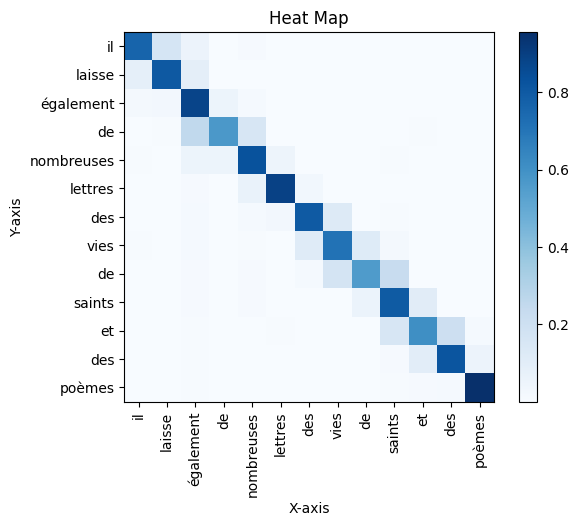

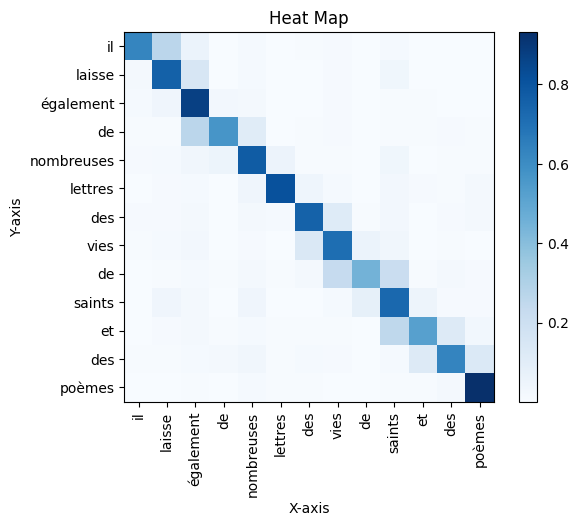

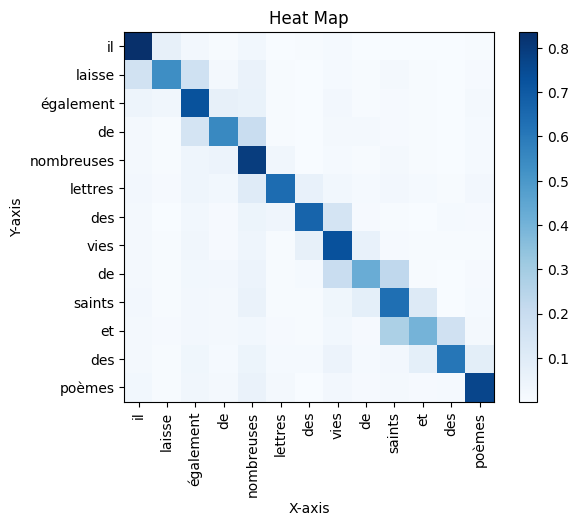

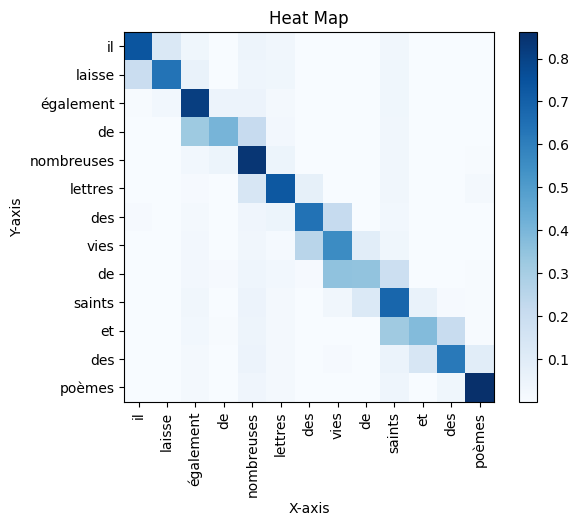

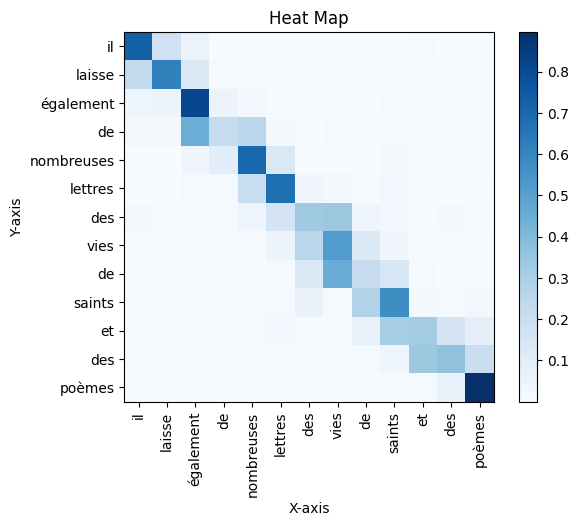

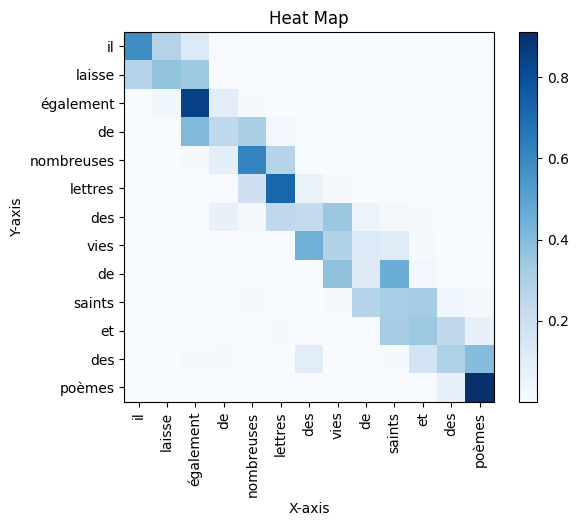

In [84]:
print(encoder_scores[ex].shape)

print(annot_data[ex]['cue_word'])
print(annot_data[ex]['target_word'])

for i in range(6):
    plt.imshow(encoder_scores[ex][i], cmap='Blues', interpolation='nearest')
    plt.colorbar()  # Show color scale


    plt.xticks(range(len(encoder_words)), encoder_words, rotation=90)  # Rotate x labels for readability
    plt.yticks(range(len(encoder_words)), encoder_words)  # Rotate x labels for readability

    plt.title('Heat Map')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.show()


(6, 22, 22)


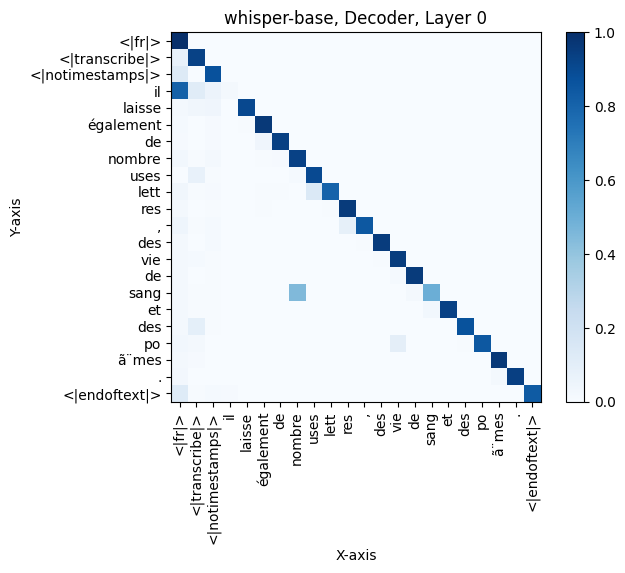

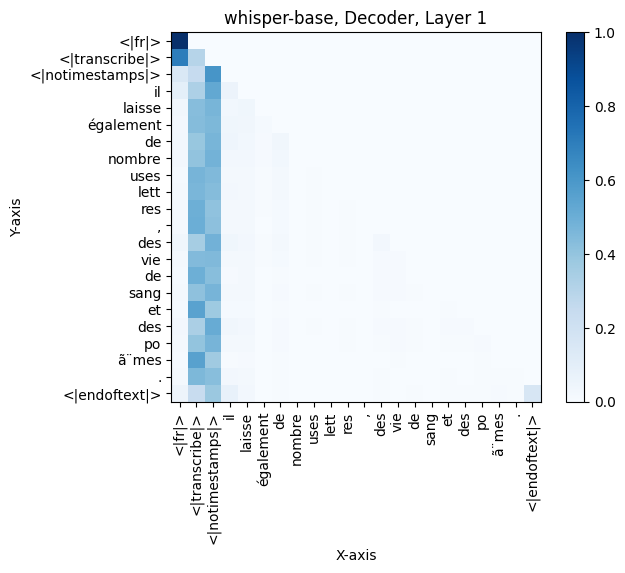

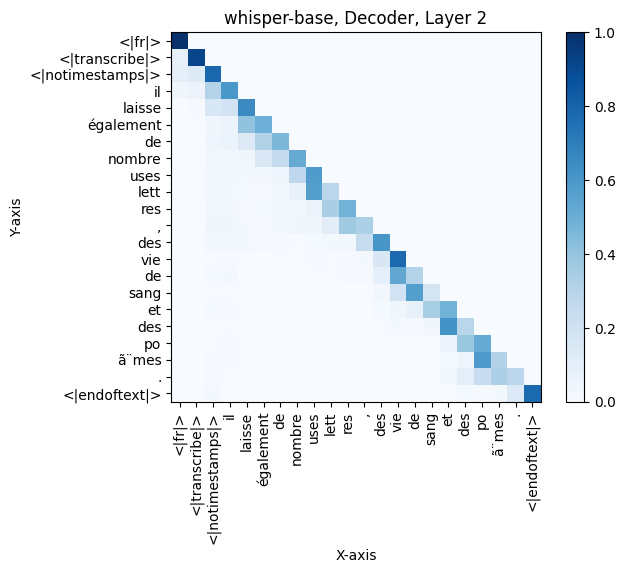

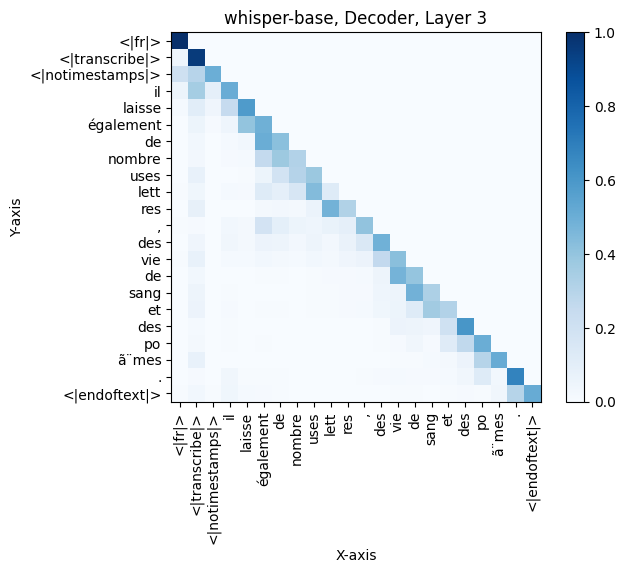

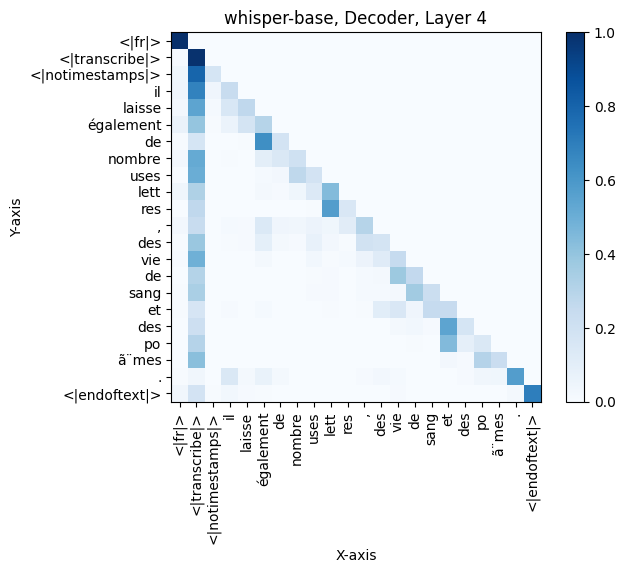

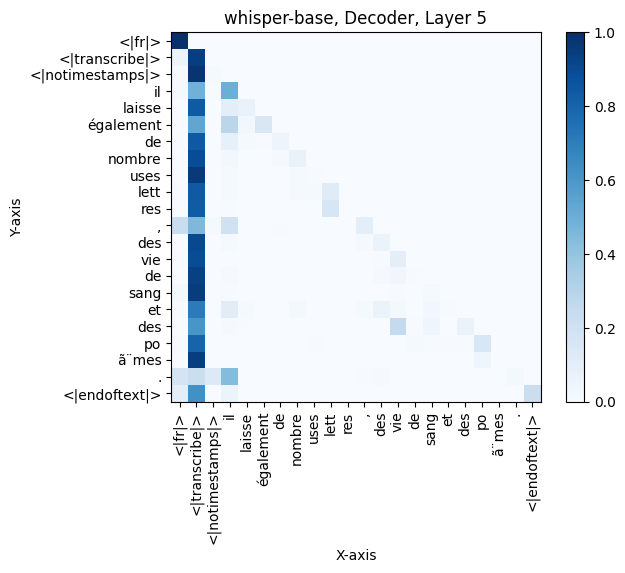

In [85]:
print(decoder_scores[ex].shape)

# print(decoder_scores[])



for i in range(len(decoder_scores[ex])):
    plt.imshow(decoder_scores[ex][i], cmap='Blues', interpolation='nearest')
    plt.colorbar()  # Show color scale


    plt.xticks(range(len(decoder_tokens)), decoder_tokens, rotation=90)  # Rotate x labels for readability
    plt.yticks(range(len(decoder_tokens)), decoder_tokens)  # Rotate x labels for readability

    plt.title(f'{MODEL_NAME}, Decoder, Layer {i}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.show()
